$\large\textbf{Question 1}$



Roll No : 22N0459 => p = 2+2+0+4+5+9 = 22

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p = 22

$\large\textbf{Question 1.2}$

In [3]:
def Unif_Rand_Perm(n, a, N):
  List = []

  for i in range(N):
    Permutation = np.random.permutation(n) + 1
    sum = 0
    
    for j in range(1, n + 1):
      sum = sum + j * Permutation[j-1]
    if sum > a:
      List.append(Permutation)

  List,count = np.unique(List,axis=0,return_counts=True)
  
  return List,count

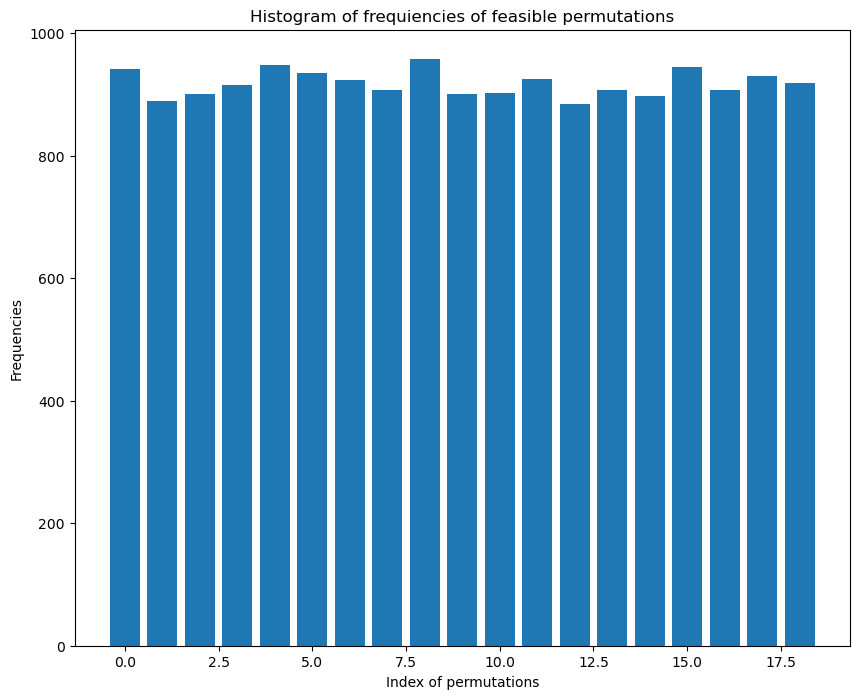

In [4]:
n,a,N = 4,p,1000*p
Feas_Perm_list,count = Unif_Rand_Perm(n,a,N)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feas_Perm_list))),count)
plt.title('Histogram of frequiencies of feasible permutations')
plt.ylabel('Frequencies')
plt.xlabel("Index of permutations")
plt.show()

$\large\textbf{Question 1.3}$

In [5]:
def Random_Feasible_Neighbour(Permutation):
  n = len(Permutation)
  List = []
  for i in range(n):
    for j in range(i+1,n):
      p_i = Permutation[i]
      p_j = Permutation[j]
      Permutation[i] = p_j
      Permutation[j] = p_i

      List.append(Permutation.copy())

      p_i = Permutation[i]
      p_j = Permutation[j]
      Permutation[j] = p_i
      Permutation[i] = p_j

  return np.array(List), List[np.random.randint(0, len(List))]

In [6]:
Random_Feasible_Neighbour([1,2,3,4])

(array([[2, 1, 3, 4],
        [3, 2, 1, 4],
        [4, 2, 3, 1],
        [1, 3, 2, 4],
        [1, 4, 3, 2],
        [1, 2, 4, 3]]),
 [1, 2, 4, 3])

In [7]:
index = np.random.randint(0, len(Feas_Perm_list))
Permutation = Feas_Perm_list[index]
print("Given Permutation:", tuple(Permutation))

Feasible_Neighbours, Uniformly_Chosen_Random_Feasible_Neaighbour = Random_Feasible_Neighbour(Permutation)

print('Feasible Neighbours of the Given Permutation:', [tuple(i) for i in Feasible_Neighbours])
print('Uniformly Chosen Random Feasible Neaighbour:', tuple(Uniformly_Chosen_Random_Feasible_Neaighbour))

Given Permutation: (2, 1, 3, 4)
Feasible Neighbours of the Given Permutation: [(1, 2, 3, 4), (3, 1, 2, 4), (4, 1, 3, 2), (2, 3, 1, 4), (2, 4, 3, 1), (2, 1, 4, 3)]
Uniformly Chosen Random Feasible Neaighbour: (3, 1, 2, 4)


In [8]:
def Monte_Carlo_Markov_Chain(n, a, N):
  List = []
  Feasible_Permutation_list, count = Unif_Rand_Perm(n, a, N)

  c = np.random.randint(0, len(Feasible_Permutation_list))
  Perm = Feasible_Permutation_list[c]

  for i in range(N):
    Feas_Perm_Neigh_List_1, Feas_Perm_Neigh_1 = Random_Feasible_Neighbour(Perm)
    p = 1/len(Feas_Perm_Neigh_List_1)
    c = np.random.randint(0, len(Feas_Perm_Neigh_List_1))
    Q = Feas_Perm_Neigh_List_1[c]
    Feas_Perm_Neigh_List_2, Feas_Perm_Neigh_2 = Random_Feasible_Neighbour(Perm)
    q = 1/len(Feas_Perm_Neigh_List_2)
    alpha  = min(p/q, 1)
    accept = np.random.uniform(0,1)

    if accept < alpha:
      List.append(Feas_Perm_Neigh_1)
      Perm = Feas_Perm_Neigh_1

  List, c = np.unique(List, axis=0, return_counts=True)
  return np.array(List), np.array(c)

$\large\textbf{Question 1.5}$

List of Feasible Permutations:
(1, 2, 3, 4)
(1, 2, 4, 3)
(1, 3, 2, 4)
(1, 3, 4, 2)
(1, 4, 2, 3)
(1, 4, 3, 2)
(2, 1, 3, 4)
(2, 1, 4, 3)
(2, 3, 1, 4)
(2, 3, 4, 1)
(2, 4, 1, 3)
(2, 4, 3, 1)
(3, 1, 2, 4)
(3, 1, 4, 2)
(3, 2, 1, 4)
(3, 2, 4, 1)
(3, 4, 1, 2)
(3, 4, 2, 1)
(4, 1, 2, 3)
(4, 1, 3, 2)
(4, 2, 1, 3)
(4, 2, 3, 1)
(4, 3, 1, 2)
(4, 3, 2, 1)


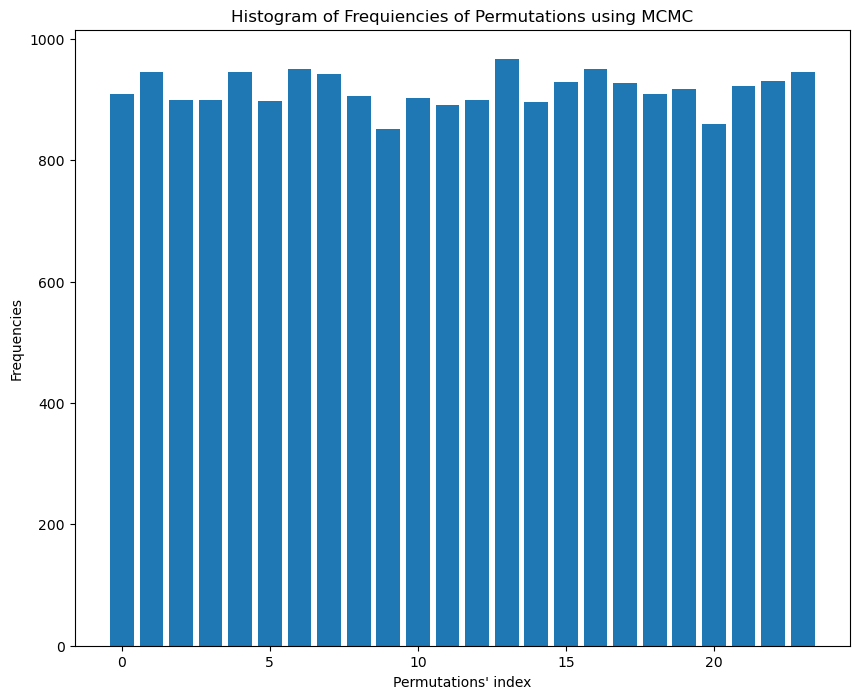

In [9]:
n, a, N = 4, p/2, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

List of Feasible Permutations:
(1, 2, 3, 4, 5, 7, 8, 6)
(1, 2, 3, 4, 7, 5, 6, 8)
(1, 2, 3, 4, 7, 5, 8, 6)
(1, 2, 3, 4, 7, 6, 5, 8)
(1, 2, 3, 4, 7, 8, 5, 6)
(1, 2, 3, 4, 8, 5, 6, 7)
(1, 2, 3, 4, 8, 6, 5, 7)
(1, 2, 3, 5, 4, 6, 8, 7)
(1, 2, 3, 5, 4, 7, 6, 8)
(1, 2, 3, 5, 6, 4, 7, 8)
(1, 2, 3, 5, 6, 7, 4, 8)
(1, 2, 3, 5, 7, 4, 6, 8)
(1, 2, 3, 5, 7, 6, 4, 8)
(1, 2, 3, 5, 7, 6, 8, 4)
(1, 2, 3, 5, 8, 4, 7, 6)
(1, 2, 3, 5, 8, 6, 7, 4)
(1, 2, 3, 5, 8, 7, 4, 6)
(1, 2, 3, 6, 4, 5, 8, 7)
(1, 2, 3, 6, 4, 8, 5, 7)
(1, 2, 3, 6, 4, 8, 7, 5)
(1, 2, 3, 6, 5, 4, 7, 8)
(1, 2, 3, 6, 5, 8, 4, 7)
(1, 2, 3, 6, 5, 8, 7, 4)
(1, 2, 3, 6, 7, 4, 5, 8)
(1, 2, 3, 6, 8, 5, 4, 7)
(1, 2, 3, 6, 8, 5, 7, 4)
(1, 2, 3, 6, 8, 7, 5, 4)
(1, 2, 3, 7, 4, 6, 5, 8)
(1, 2, 3, 7, 4, 6, 8, 5)
(1, 2, 3, 7, 4, 8, 5, 6)
(1, 2, 3, 7, 4, 8, 6, 5)
(1, 2, 3, 7, 5, 4, 8, 6)
(1, 2, 3, 7, 6, 4, 5, 8)
(1, 2, 3, 7, 6, 5, 4, 8)
(1, 2, 3, 7, 8, 4, 5, 6)
(1, 2, 3, 7, 8, 6, 4, 5)
(1, 2, 3, 7, 8, 6, 5, 4)
(1, 2, 3, 8, 4, 7, 5, 6)
(1, 2, 3, 8, 4, 7, 

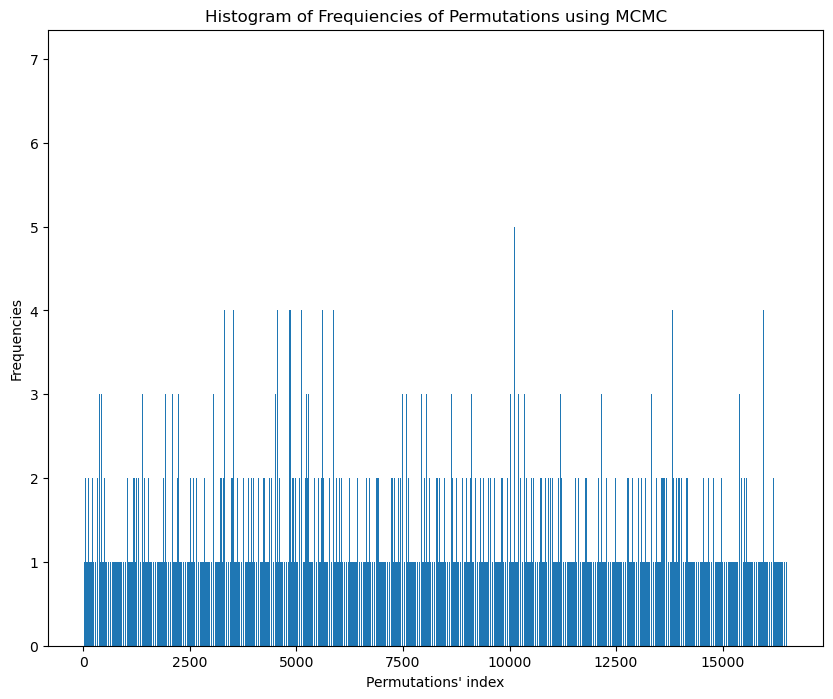

In [10]:
n, a, N = 8, p/2, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

List of Feasible Permutations:
(1, 2, 3, 4, 9, 10, 12, 7, 8, 5, 6, 11)
(1, 2, 3, 4, 10, 12, 5, 9, 11, 6, 8, 7)
(1, 2, 3, 5, 9, 6, 10, 7, 4, 11, 8, 12)
(1, 2, 3, 5, 9, 6, 11, 7, 4, 10, 8, 12)
(1, 2, 3, 7, 9, 11, 10, 12, 8, 4, 5, 6)
(1, 2, 3, 7, 9, 12, 10, 11, 8, 4, 5, 6)
(1, 2, 3, 8, 12, 11, 5, 7, 9, 6, 10, 4)
(1, 2, 3, 9, 8, 11, 4, 5, 7, 6, 10, 12)
(1, 2, 3, 9, 8, 11, 4, 5, 7, 10, 6, 12)
(1, 2, 3, 10, 4, 8, 9, 11, 5, 6, 12, 7)
(1, 2, 3, 10, 9, 8, 4, 11, 5, 6, 12, 7)
(1, 2, 3, 11, 9, 8, 4, 10, 5, 6, 12, 7)
(1, 2, 3, 12, 10, 4, 5, 9, 11, 6, 7, 8)
(1, 2, 3, 12, 10, 4, 5, 9, 11, 6, 8, 7)
(1, 2, 4, 3, 6, 9, 7, 11, 8, 10, 5, 12)
(1, 2, 4, 3, 6, 9, 10, 5, 12, 8, 7, 11)
(1, 2, 4, 3, 9, 11, 10, 5, 12, 8, 7, 6)
(1, 2, 4, 3, 10, 9, 6, 8, 5, 11, 12, 7)
(1, 2, 4, 3, 10, 9, 6, 8, 11, 5, 12, 7)
(1, 2, 4, 3, 11, 9, 10, 5, 12, 8, 7, 6)
(1, 2, 4, 5, 12, 6, 8, 7, 11, 10, 9, 3)
(1, 2, 4, 6, 7, 11, 8, 3, 9, 10, 12, 5)
(1, 2, 4, 7, 6, 9, 10, 5, 12, 8, 3, 11)
(1, 2, 4, 7, 6, 9, 10, 11, 12, 8, 3, 5)
(1, 2, 4,

(10, 11, 6, 9, 8, 2, 5, 4, 12, 1, 3, 7)
(10, 11, 7, 1, 2, 3, 4, 12, 9, 8, 6, 5)
(10, 11, 7, 1, 8, 3, 4, 12, 9, 2, 6, 5)
(10, 11, 7, 1, 8, 3, 4, 12, 9, 5, 6, 2)
(10, 11, 7, 6, 2, 8, 3, 9, 4, 12, 5, 1)
(10, 11, 7, 6, 3, 8, 2, 4, 12, 9, 1, 5)
(10, 11, 7, 6, 3, 9, 2, 4, 12, 8, 1, 5)
(10, 11, 7, 6, 3, 9, 4, 2, 12, 8, 1, 5)
(10, 11, 7, 6, 3, 9, 12, 2, 4, 8, 1, 5)
(10, 11, 7, 6, 3, 9, 12, 4, 2, 8, 1, 5)
(10, 11, 7, 6, 3, 9, 12, 8, 4, 2, 1, 5)
(10, 11, 7, 6, 3, 9, 12, 8, 4, 5, 1, 2)
(10, 11, 7, 6, 4, 1, 8, 12, 9, 2, 5, 3)
(10, 11, 7, 6, 4, 12, 3, 1, 2, 9, 8, 5)
(10, 11, 7, 6, 8, 2, 3, 9, 4, 12, 5, 1)
(10, 11, 7, 6, 8, 9, 12, 3, 4, 5, 1, 2)
(10, 11, 7, 6, 8, 9, 12, 4, 2, 3, 1, 5)
(10, 11, 7, 6, 8, 12, 3, 1, 2, 4, 9, 5)
(10, 11, 7, 6, 8, 12, 5, 1, 2, 4, 9, 3)
(10, 11, 7, 6, 9, 8, 2, 4, 12, 3, 1, 5)
(10, 11, 7, 6, 9, 8, 12, 4, 2, 3, 1, 5)
(10, 11, 7, 6, 9, 12, 3, 1, 2, 4, 8, 5)
(10, 11, 7, 8, 6, 2, 3, 9, 4, 12, 5, 1)
(10, 11, 8, 1, 5, 4, 3, 9, 2, 12, 7, 6)
(10, 11, 8, 4, 2, 5, 6, 9, 3, 7, 1, 12)


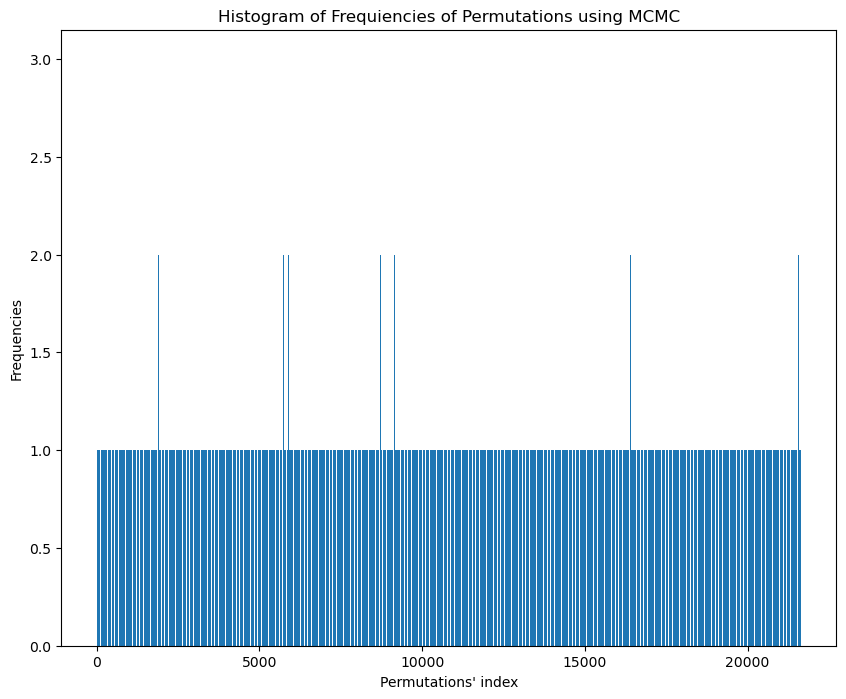

In [11]:
n, a, N = 12, p/2, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

n, a, N = 2, 44, 22000
No feasible solution for this setup

List of Feasible Permutations:
(1, 2, 3, 4, 5, 7, 6, 8)
(1, 2, 3, 4, 6, 5, 8, 7)
(1, 2, 3, 4, 6, 7, 5, 8)
(1, 2, 3, 4, 7, 5, 6, 8)
(1, 2, 3, 4, 7, 6, 5, 8)
(1, 2, 3, 4, 7, 6, 8, 5)
(1, 2, 3, 4, 7, 8, 5, 6)
(1, 2, 3, 5, 4, 6, 7, 8)
(1, 2, 3, 5, 4, 7, 6, 8)
(1, 2, 3, 5, 4, 8, 7, 6)
(1, 2, 3, 5, 6, 4, 8, 7)
(1, 2, 3, 5, 6, 7, 4, 8)
(1, 2, 3, 5, 7, 6, 4, 8)
(1, 2, 3, 5, 7, 8, 4, 6)
(1, 2, 3, 5, 8, 7, 4, 6)
(1, 2, 3, 5, 8, 7, 6, 4)
(1, 2, 3, 6, 4, 5, 8, 7)
(1, 2, 3, 6, 4, 7, 5, 8)
(1, 2, 3, 6, 4, 8, 7, 5)
(1, 2, 3, 6, 5, 4, 7, 8)
(1, 2, 3, 6, 5, 4, 8, 7)
(1, 2, 3, 6, 7, 5, 8, 4)
(1, 2, 3, 6, 7, 8, 4, 5)
(1, 2, 3, 7, 4, 5, 6, 8)
(1, 2, 3, 7, 4, 5, 8, 6)
(1, 2, 3, 7, 4, 6, 5, 8)
(1, 2, 3, 7, 4, 6, 8, 5)
(1, 2, 3, 7, 4, 8, 5, 6)
(1, 2, 3, 7, 4, 8, 6, 5)
(1, 2, 3, 7, 5, 4, 6, 8)
(1, 2, 3, 7, 5, 6, 4, 8)
(1, 2, 3, 7, 5, 8, 4, 6)
(1, 2, 3, 7, 6, 4, 5, 8)
(1, 2, 3, 7, 6, 4, 8, 5)
(1, 2, 3, 7, 6, 5, 4, 8)
(1, 2, 3, 7, 6, 5, 8, 4)
(1, 2, 3, 7, 8, 4, 6, 5)
(1, 2, 3, 7, 8, 5, 4, 6)
(1, 2, 3, 8, 4, 5, 

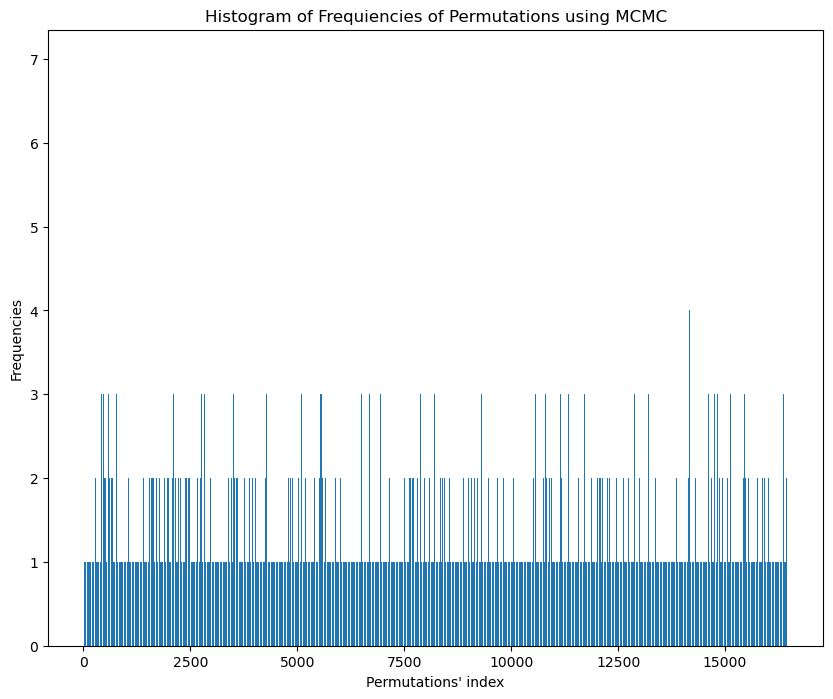

In [12]:
n, a, N = 8,2*p, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

List of Feasible Permutations:
(1, 2, 3, 5, 4, 9, 12, 11, 10, 7, 6, 8)
(1, 2, 3, 5, 6, 7, 9, 8, 10, 11, 4, 12)
(1, 2, 3, 5, 6, 9, 12, 11, 10, 7, 4, 8)
(1, 2, 3, 5, 8, 6, 10, 9, 12, 4, 7, 11)
(1, 2, 3, 6, 5, 7, 9, 4, 10, 11, 8, 12)
(1, 2, 3, 6, 5, 7, 9, 4, 10, 12, 8, 11)
(1, 2, 3, 6, 5, 7, 9, 8, 10, 11, 4, 12)
(1, 2, 3, 6, 7, 8, 12, 4, 5, 10, 9, 11)
(1, 2, 3, 6, 8, 5, 10, 9, 12, 4, 7, 11)
(1, 2, 3, 6, 10, 7, 9, 12, 11, 4, 8, 5)
(1, 2, 3, 6, 12, 5, 7, 4, 9, 10, 8, 11)
(1, 2, 3, 6, 12, 5, 10, 4, 9, 7, 8, 11)
(1, 2, 3, 6, 12, 5, 10, 4, 9, 8, 7, 11)
(1, 2, 3, 6, 12, 8, 7, 4, 5, 10, 9, 11)
(1, 2, 3, 6, 12, 8, 7, 4, 9, 10, 5, 11)
(1, 2, 3, 7, 12, 4, 11, 5, 10, 6, 8, 9)
(1, 2, 3, 8, 5, 4, 6, 12, 7, 9, 11, 10)
(1, 2, 3, 8, 10, 7, 12, 9, 11, 5, 6, 4)
(1, 2, 3, 8, 12, 7, 5, 11, 10, 9, 6, 4)
(1, 2, 3, 10, 5, 8, 9, 12, 6, 4, 7, 11)
(1, 2, 3, 11, 6, 7, 9, 8, 10, 5, 4, 12)
(1, 2, 3, 11, 9, 12, 8, 7, 4, 10, 5, 6)
(1, 2, 3, 12, 5, 6, 4, 9, 10, 8, 7, 11)
(1, 2, 3, 12, 6, 5, 11, 8, 4, 10, 9, 7)
(1, 2, 3,

(12, 6, 11, 8, 7, 10, 3, 4, 5, 2, 1, 9)
(12, 6, 11, 8, 7, 10, 3, 5, 4, 2, 1, 9)
(12, 7, 1, 4, 10, 3, 6, 8, 11, 2, 9, 5)
(12, 7, 1, 5, 2, 4, 11, 8, 9, 10, 3, 6)
(12, 7, 1, 5, 2, 8, 6, 4, 9, 10, 3, 11)
(12, 7, 1, 5, 2, 8, 11, 4, 9, 10, 3, 6)
(12, 7, 1, 6, 3, 9, 5, 4, 10, 2, 8, 11)
(12, 7, 1, 6, 3, 9, 10, 4, 5, 2, 8, 11)
(12, 7, 1, 9, 10, 3, 6, 8, 11, 2, 4, 5)
(12, 7, 1, 9, 10, 3, 6, 8, 11, 5, 4, 2)
(12, 7, 1, 11, 5, 2, 3, 8, 10, 6, 9, 4)
(12, 7, 2, 1, 5, 3, 10, 9, 6, 11, 8, 4)
(12, 7, 2, 1, 5, 10, 3, 9, 6, 11, 8, 4)
(12, 7, 2, 1, 5, 10, 8, 9, 6, 11, 3, 4)
(12, 7, 2, 1, 11, 6, 8, 9, 4, 3, 10, 5)
(12, 7, 2, 1, 11, 8, 6, 9, 4, 3, 10, 5)
(12, 7, 2, 3, 8, 10, 5, 1, 4, 9, 6, 11)
(12, 7, 2, 3, 9, 10, 5, 1, 4, 8, 6, 11)
(12, 7, 2, 5, 11, 1, 10, 6, 9, 8, 4, 3)
(12, 7, 2, 5, 11, 6, 10, 1, 9, 8, 4, 3)
(12, 7, 2, 6, 5, 10, 8, 11, 1, 9, 3, 4)
(12, 7, 2, 6, 5, 10, 8, 11, 3, 9, 1, 4)
(12, 7, 2, 8, 11, 6, 10, 1, 9, 5, 4, 3)
(12, 7, 2, 10, 4, 6, 5, 9, 3, 1, 8, 11)
(12, 7, 2, 10, 4, 6, 8, 9, 3, 1, 5, 11)


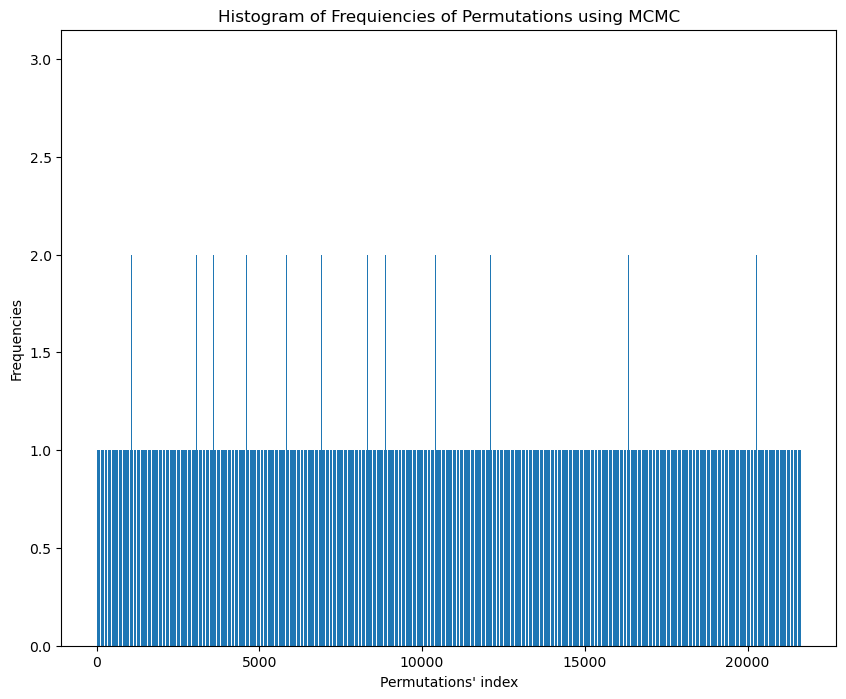

In [13]:
n, a, N = 12,2*p, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

n, a, N = 2,66, 22000
No feasible solution for this combination

List of Feasible Permutations:
(1, 2, 3, 4, 5, 8, 7, 6)
(1, 2, 3, 4, 6, 5, 7, 8)
(1, 2, 3, 4, 6, 7, 8, 5)
(1, 2, 3, 4, 7, 5, 8, 6)
(1, 2, 3, 4, 7, 6, 8, 5)
(1, 2, 3, 4, 7, 8, 5, 6)
(1, 2, 3, 4, 7, 8, 6, 5)
(1, 2, 3, 4, 8, 5, 6, 7)
(1, 2, 3, 4, 8, 7, 6, 5)
(1, 2, 3, 5, 4, 6, 8, 7)
(1, 2, 3, 5, 4, 8, 7, 6)
(1, 2, 3, 5, 6, 4, 7, 8)
(1, 2, 3, 5, 7, 4, 6, 8)
(1, 2, 3, 5, 7, 8, 4, 6)
(1, 2, 3, 5, 8, 4, 6, 7)
(1, 2, 3, 5, 8, 4, 7, 6)
(1, 2, 3, 5, 8, 6, 7, 4)
(1, 2, 3, 6, 4, 5, 8, 7)
(1, 2, 3, 6, 4, 7, 5, 8)
(1, 2, 3, 6, 4, 7, 8, 5)
(1, 2, 3, 6, 5, 4, 8, 7)
(1, 2, 3, 6, 5, 7, 4, 8)
(1, 2, 3, 6, 5, 7, 8, 4)
(1, 2, 3, 6, 7, 5, 8, 4)
(1, 2, 3, 6, 8, 4, 5, 7)
(1, 2, 3, 6, 8, 4, 7, 5)
(1, 2, 3, 6, 8, 5, 4, 7)
(1, 2, 3, 7, 4, 5, 6, 8)
(1, 2, 3, 7, 4, 6, 8, 5)
(1, 2, 3, 7, 5, 4, 6, 8)
(1, 2, 3, 7, 5, 4, 8, 6)
(1, 2, 3, 7, 5, 8, 6, 4)
(1, 2, 3, 7, 6, 4, 8, 5)
(1, 2, 3, 7, 6, 5, 4, 8)
(1, 2, 3, 7, 6, 5, 8, 4)
(1, 2, 3, 7, 6, 8, 4, 5)
(1, 2, 3, 7, 8, 5, 6, 4)
(1, 2, 3, 8, 4, 6, 5, 7)
(1, 2, 3, 8, 4, 6, 

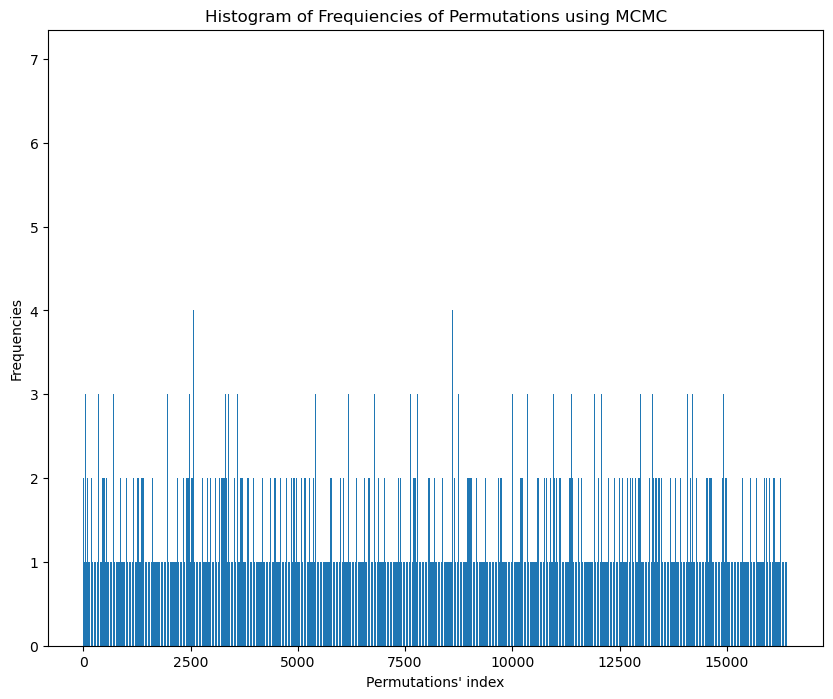

In [14]:
n, a, N = 8,3*p, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

List of Feasible Permutations:
(1, 2, 3, 4, 6, 11, 9, 8, 12, 10, 5, 7)
(1, 2, 3, 4, 6, 12, 9, 8, 11, 10, 5, 7)
(1, 2, 3, 5, 7, 8, 4, 6, 10, 11, 12, 9)
(1, 2, 3, 5, 8, 4, 7, 10, 9, 6, 11, 12)
(1, 2, 3, 5, 8, 7, 4, 10, 9, 6, 11, 12)
(1, 2, 3, 5, 8, 11, 7, 10, 9, 6, 4, 12)
(1, 2, 3, 5, 8, 12, 7, 11, 4, 10, 9, 6)
(1, 2, 3, 5, 10, 7, 8, 6, 11, 4, 12, 9)
(1, 2, 3, 5, 10, 9, 8, 7, 6, 4, 12, 11)
(1, 2, 3, 5, 10, 9, 8, 7, 6, 12, 4, 11)
(1, 2, 3, 5, 10, 11, 8, 6, 7, 4, 12, 9)
(1, 2, 3, 5, 10, 11, 8, 7, 6, 4, 12, 9)
(1, 2, 3, 9, 11, 4, 10, 7, 5, 8, 6, 12)
(1, 2, 3, 9, 11, 7, 10, 4, 5, 8, 6, 12)
(1, 2, 3, 9, 11, 7, 10, 4, 8, 5, 6, 12)
(1, 2, 3, 9, 11, 12, 6, 7, 4, 8, 5, 10)
(1, 2, 3, 10, 9, 6, 12, 4, 8, 11, 5, 7)
(1, 2, 3, 11, 7, 8, 4, 6, 10, 5, 12, 9)
(1, 2, 3, 11, 9, 5, 6, 12, 8, 10, 4, 7)
(1, 2, 3, 12, 11, 6, 8, 9, 7, 5, 10, 4)
(1, 2, 3, 12, 11, 6, 10, 5, 7, 4, 8, 9)
(1, 2, 3, 12, 11, 6, 10, 9, 7, 4, 8, 5)
(1, 2, 3, 12, 11, 6, 10, 9, 7, 5, 8, 4)
(1, 2, 4, 6, 5, 11, 7, 3, 9, 10, 8, 12)
(1, 2, 4,

(11, 5, 7, 4, 10, 12, 9, 8, 3, 1, 6, 2)
(11, 5, 7, 4, 10, 12, 9, 8, 6, 1, 3, 2)
(11, 5, 7, 6, 2, 9, 8, 3, 1, 4, 10, 12)
(11, 5, 7, 6, 12, 2, 4, 9, 8, 3, 1, 10)
(11, 5, 7, 6, 12, 10, 4, 9, 8, 3, 1, 2)
(11, 5, 7, 8, 3, 2, 12, 1, 4, 6, 10, 9)
(11, 5, 7, 8, 3, 10, 12, 1, 4, 6, 2, 9)
(11, 5, 7, 8, 3, 10, 12, 1, 4, 9, 6, 2)
(11, 5, 7, 8, 3, 10, 12, 1, 6, 4, 2, 9)
(11, 5, 7, 8, 3, 10, 12, 1, 6, 4, 9, 2)
(11, 5, 7, 8, 3, 10, 12, 1, 9, 4, 6, 2)
(11, 5, 7, 8, 6, 4, 3, 12, 10, 1, 9, 2)
(11, 5, 7, 8, 9, 12, 2, 3, 6, 10, 1, 4)
(11, 5, 7, 8, 9, 12, 2, 4, 6, 10, 1, 3)
(11, 5, 7, 9, 3, 10, 12, 1, 4, 8, 6, 2)
(11, 5, 7, 9, 3, 12, 8, 4, 6, 10, 1, 2)
(11, 5, 7, 9, 4, 10, 12, 1, 3, 2, 6, 8)
(11, 5, 7, 9, 4, 10, 12, 1, 3, 8, 6, 2)
(11, 5, 7, 9, 6, 4, 3, 12, 10, 1, 8, 2)
(11, 5, 7, 9, 12, 2, 4, 6, 8, 3, 1, 10)
(11, 5, 7, 9, 12, 2, 4, 6, 10, 3, 1, 8)
(11, 5, 7, 9, 12, 10, 4, 6, 8, 3, 1, 2)
(11, 5, 7, 10, 2, 12, 8, 4, 1, 3, 9, 6)
(11, 5, 7, 10, 3, 12, 8, 4, 1, 2, 9, 6)
(11, 5, 7, 10, 9, 6, 1, 12, 8, 3, 4, 2)


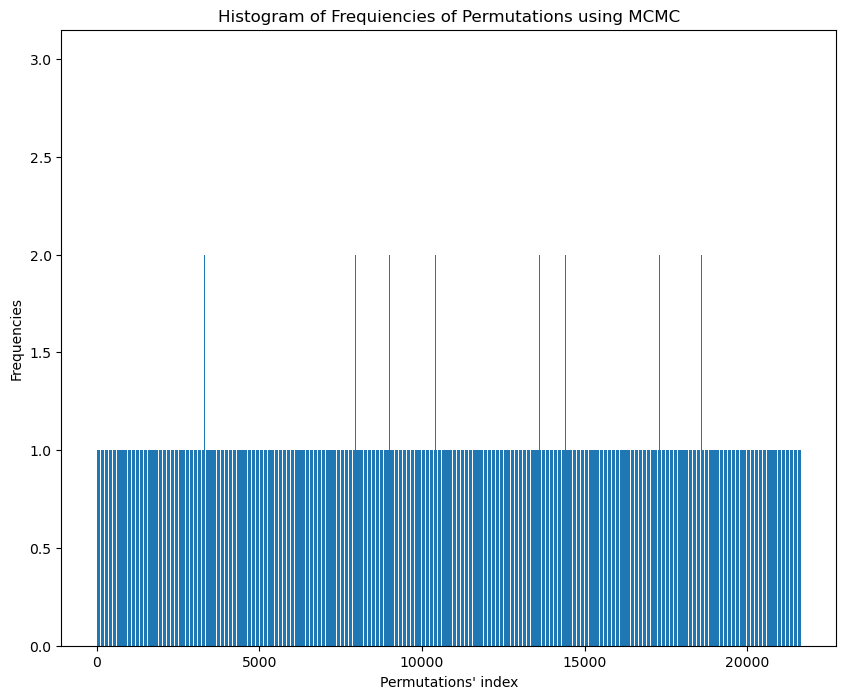

In [15]:
n, a, N = 12,3*p, 1000*p
Feasible_Permutation_list, count = Monte_Carlo_Markov_Chain(n, a, N)
print('List of Feasible Permutations:')
for i in [tuple(i) for i in Feasible_Permutation_list]:
  print(i)
plt.figure(figsize=(10,8))
plt.bar(list(range(len(Feasible_Permutation_list))), count)
plt.title('Histogram of Frequiencies of Permutations using MCMC')
plt.xlabel("Permutations' index")
plt.ylabel('Frequencies')
plt.show()

Result by MCMC is same as obtained by other method.

$\large\textbf{Question 2}$



$\large\textbf{Question 2.2}$



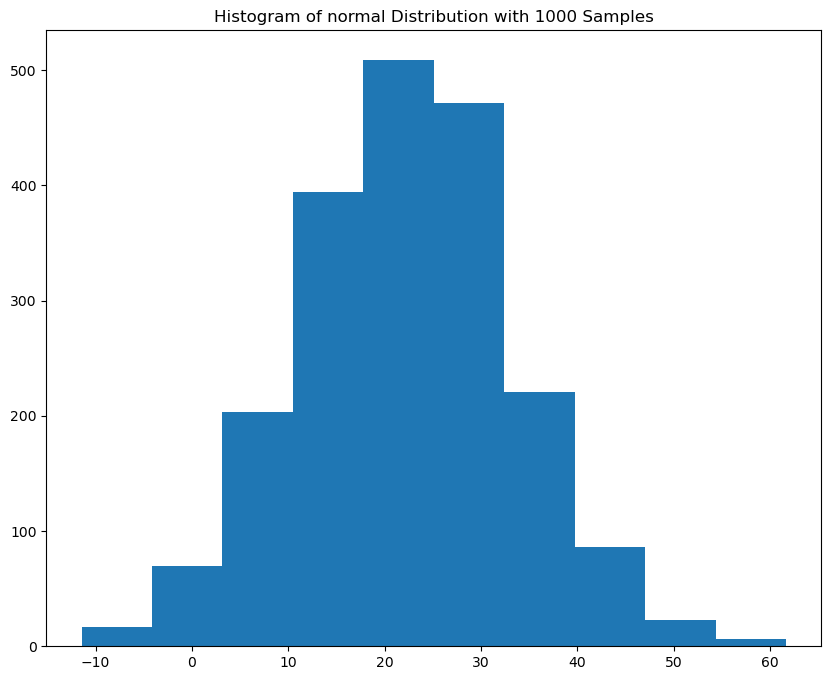

In [16]:
plt.figure(figsize=(10,8))
plt.hist(np.random.normal(p, p/2, 2000))
plt.title('Histogram of normal Distribution with 1000 Samples')
plt.show()

$\large\textbf{Question 2.3}$



In [17]:
def prior(theta):
  if theta[1] > 0:
    return 1
  else:
    return 0

$\large\textbf{Question 2.4}$



In [18]:
def transition_model_fn(theta):
  return [theta[0], np.random.normal(theta[1], 1)]

$\large\textbf{Question 2.5}$



In [19]:
def log_like_fn(theta, D):
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))

Log is an increasing function so, monotonocity does changes after taking log. We use log likelihood because it is better as it has more floating point precision.

$\large\textbf{Question 2.6}$



In [20]:
def acceptance(theta, theta_new):
  if theta_new>theta:
    return True
  else:
    if np.random.uniform(0,1)<np.exp(theta_new-theta):
      return True
    else:
      return False

$\large\textbf{Question 2.7}$



In [21]:
def Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, Initial_State, Iterations, D, acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = transition_model_fn(theta)
    theta_lik = log_like_fn(theta, D)
    theta_new_lik = log_like_fn(theta_new, D) 
    if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

For First 500 Iterations :


C:\Users\91834\AppData\Local\Temp\ipykernel_14208\3973220991.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))
C:\Users\91834\AppData\Local\Temp\ipykernel_14208\2572267668.py:8: RuntimeWarning: divide by zero encountered in log
  if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:


[]

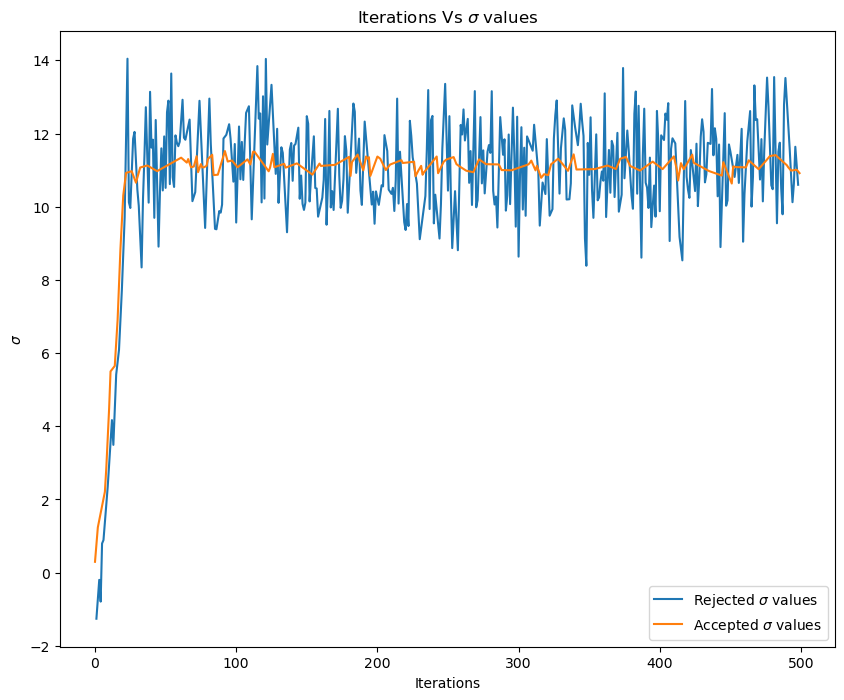

In [30]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, [p,0.1], 500, np.random.normal(p, p/2, 2000), acceptance)
print('For First 500 Iterations :')
plt.figure(figsize=(10,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected $\sigma$ values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted $\sigma$ values')
plt.legend()
plt.title(r'Iterations Vs $\sigma$ values')
plt.xlabel('Iterations')
plt.ylabel(r'$\sigma$')
plt.plot()

C:\Users\91834\AppData\Local\Temp\ipykernel_14208\3973220991.py:2: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1]*np.sqrt(2*np.pi))-((D-theta[0])**2)/(2*theta[1]**2))
C:\Users\91834\AppData\Local\Temp\ipykernel_14208\2572267668.py:8: RuntimeWarning: divide by zero encountered in log
  if acceptance(theta_lik + np.log(prior(theta)), theta_new_lik + np.log(prior(theta_new))) == True:


For 50000 Iterations :


[]

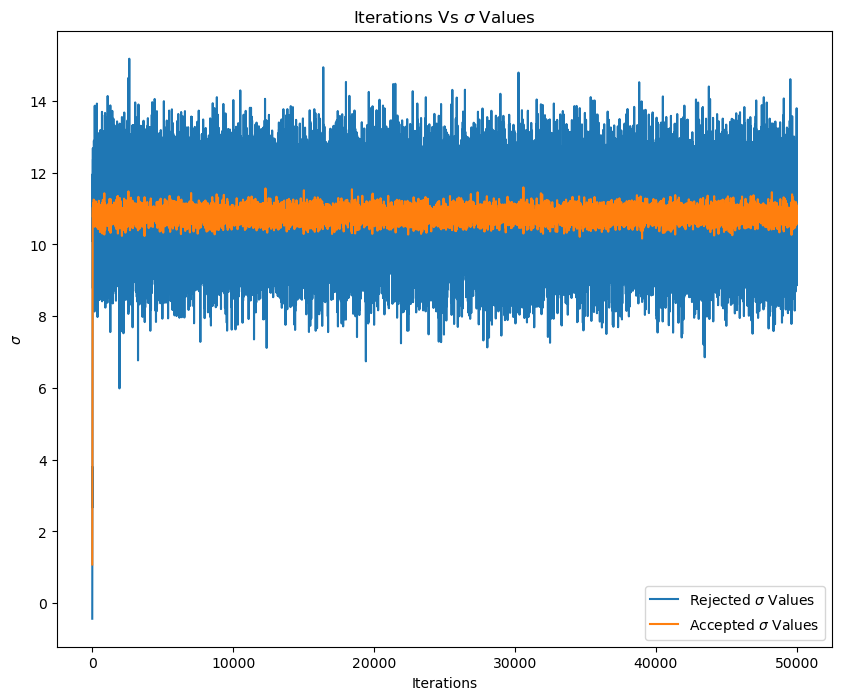

In [31]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = Metropolis_Algorithm(log_like_fn, prior, transition_model_fn, [p,0.1], 50000, np.random.normal(p, p/2, 2000), acceptance)
print('For 50000 Iterations :')
plt.figure(figsize=(10,8))
plt.plot(Iteration_Rejected, Rejected[:,1], label = r'Rejected $\sigma$ Values')
plt.plot(Iteration_Accepted, Accepted[:,1], label = r'Accepted $\sigma$ Values')
plt.legend()
plt.title(r'Iterations Vs $\sigma$ Values')
plt.xlabel('Iterations')
plt.ylabel(r'$\sigma$')
plt.plot()

Here the rejected region of $\sigma$ values is oscillating very fastly aroud $\sigma = 11$ and the accepted region is converging nearby $\sigma 11$.

$\large\textbf{Question 2.8}$

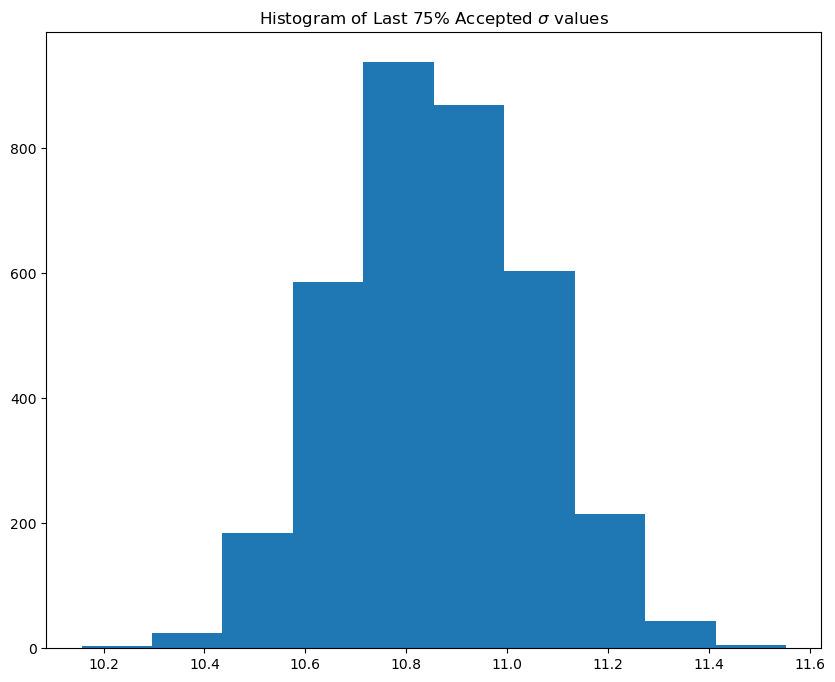

In [24]:
New_Accepted = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()

Dropping first few $\sigma$ values makes sense because the acceptance region is taking some time to converge.

$\large\textbf{Question 2.9}$

In [25]:
def new_prior(theta):
  if theta[1] > 0:
    if p/2 <= theta[0] <= 3*p/2:
      return 1/10
    else:
      return 0
  else:
    return 0

def new_transition_model(theta):
  return np.random.multivariate_normal(theta, np.identity(2))

def new_log_likelihood(theta, D):
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
  
def new_acceptance(theta_current, theta_new):
  if theta_new > theta_current:
    return True
  else:
    if np.random.uniform(0,1) < np.exp(theta_new - theta_current):
      return True
    else:
      return False

def New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, Initial_State, Iterations, D, new_acceptance):
  theta = Initial_State
  Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = [], [], [], []
  for i in range(Iterations):
    theta_new = new_transition_model(theta)
    theta_lik = new_log_likelihood(theta, D)
    theta_new_lik = new_log_likelihood(theta_new, D) 
    if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:            
      theta = theta_new
      Accepted.append(theta_new)
      Iteration_Accepted.append(i)
    else:
      Rejected.append(theta_new) 
      Iteration_Rejected.append(i)          
  return np.array(Accepted), np.array(Rejected), np.array(Iteration_Accepted), np.array(Iteration_Rejected)

$\large\textbf{Question 2.10}$

**For number of iteration = 5000**

**Histogram of Last 75% Accepted $\mu$ values :**

C:\Users\91834\AppData\Local\Temp\ipykernel_14208\321526546.py:14: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
C:\Users\91834\AppData\Local\Temp\ipykernel_14208\321526546.py:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:


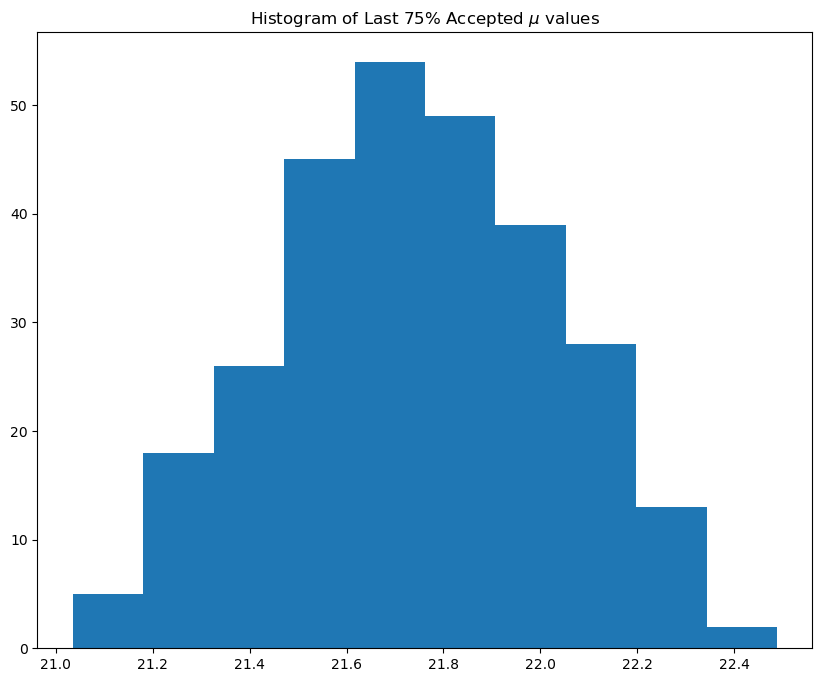

In [32]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, [p/2,0.1], 5000, np.random.normal(p, p/2, 2000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted $\mu$ values')
plt.show()

**Histogram of Last 75% Accepted $\sigma$ values :**

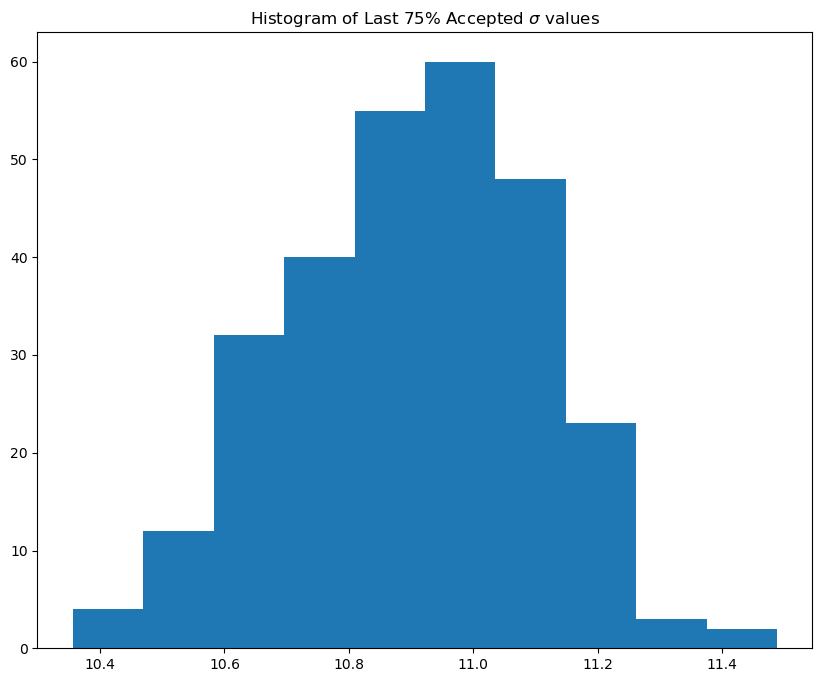

In [33]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()

**For number of iteration = 5000**

**Histogram of Last 75% Accepted $\mu$ values :**

C:\Users\91834\AppData\Local\Temp\ipykernel_14208\321526546.py:14: RuntimeWarning: invalid value encountered in log
  return np.sum(-np.log(theta[1] * np.sqrt(2* np.pi))-((D-theta[0])**2) / (2*theta[1]**2))
C:\Users\91834\AppData\Local\Temp\ipykernel_14208\321526546.py:32: RuntimeWarning: divide by zero encountered in log
  if new_acceptance(theta_lik + np.log(new_prior(theta)), theta_new_lik + np.log(new_prior(theta_new))) == True:


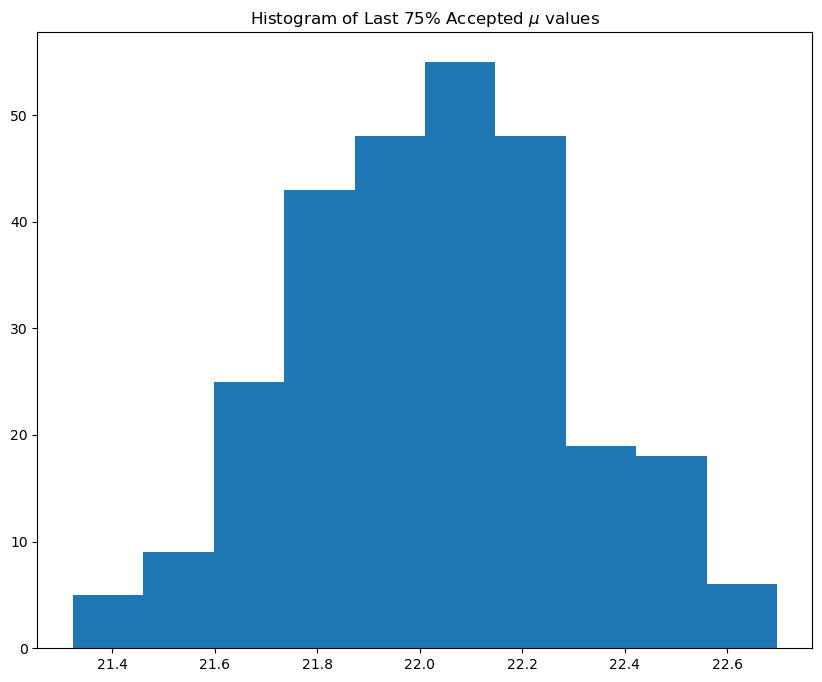

In [34]:
Accepted, Rejected, Iteration_Accepted, Iteration_Rejected = New_Metropolis_Algorithm(new_log_likelihood, new_prior, new_transition_model, [p/2,0.1], 5000, np.random.normal(p, p/2, 2000), new_acceptance)

New_Accepted_mu = Accepted[:,0][int(0.25*len(Accepted[:,0]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_mu)
plt.title(r'Histogram of Last 75% Accepted $\mu$ values')
plt.show()

**Histogram of Last 75% Accepted $\sigma$ values:**

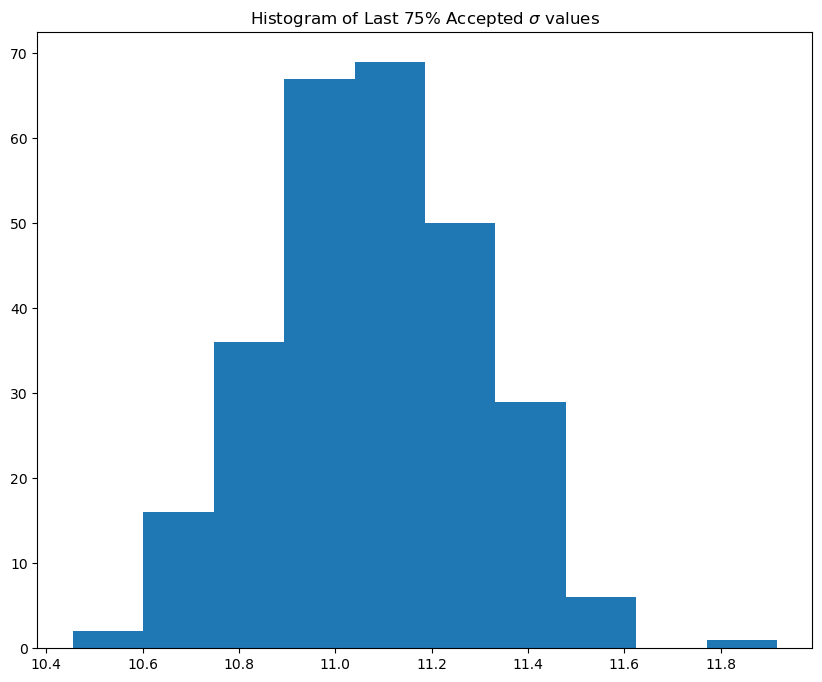

In [35]:
New_Accepted_sigma = Accepted[:,1][int(0.25*len(Accepted[:,1]))::]
plt.figure(figsize=(10,8))
plt.hist(New_Accepted_sigma)
plt.title(r'Histogram of Last 75% Accepted $\sigma$ values')
plt.show()